<a href="https://colab.research.google.com/github/nimiCurtis/Computer_Vision_Course/blob/main/CV_mnist_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Digits Classification using Neural Networks



Mount your drive in order to run locally with colab

In [52]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


download & load the MNIST dataset.

*just run the next two cells and observe the outputs (shift&enter)

the training data set contains 60000 samples
each sample image from the training data set is a column-stacked grayscale image of 784 pixels
 this vectorized arrangement of the data is suitable for a Fully-Connected NN (as apposed to a Convolutional NN)
these column-stacked images can be reshaped to an image of (28, 28) pixels


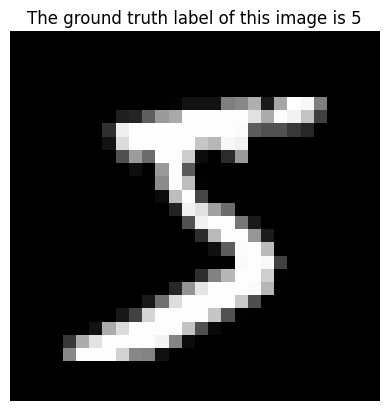

In [53]:

#importing modules that will be in use
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import gzip
import pickle
from PIL import Image
import random
import numpy as np

def _download(file_name):
    file_path = os.path.join(dataset_dir,file_name)

    if os.path.exists(file_path):
        return

    print("Downloading " + file_name + " ... ")
    urllib.request.urlretrieve(url_base + file_name, file_name)
    print("Done")

def download_mnist():
    for v in key_file.values():
       _download(v)

def _load_label(file_name):
    file_path =  os.path.join(dataset_dir, file_name)

    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
    print("Done")

    return labels

def _load_img(file_name):
    file_path = os.path.join(dataset_dir,file_name)

    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, img_size)
    print("Done")

    return data

def _convert_numpy():
    dataset = {}
    dataset['train_img'] =  _load_img(key_file['train_img'])
    dataset['train_label'] = _load_label(key_file['train_label'])
    dataset['test_img'] = _load_img(key_file['test_img'])
    dataset['test_label'] = _load_label(key_file['test_label'])

    return dataset

def init_mnist():
    download_mnist()
    dataset = _convert_numpy()
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1)
    print("Done")

def _change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1

    return T

def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """
    Parameters
    ----------
    normalize : Normalize the pixel values
    flatten : Flatten the images as one array
    one_hot_label : Encode the labels as a one-hot array

    Returns
    -------
    (Trainig Image, Training Label), (Test Image, Test Label)
    """
    if not os.path.exists(save_file):
        init_mnist()

    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)

    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0

    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label'])


# Load the MNIST dataset
url_base = 'http://yann.lecun.com/exdb/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

dataset_dir = '/content'
save_file = dataset_dir + "/mnist.pkl"

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True)


# printing data shape

print('the training data set contains '+ str(x_train.shape[0]) + ' samples')

img = x_train[0]
label = t_train[0]

img = img.reshape(28, 28)
print('each sample image from the training data set is a column-stacked grayscale image of '+ str(x_train.shape[1]) +' pixels'
      + '\n this vectorized arrangement of the data is suitable for a Fully-Connected NN (as apposed to a Convolutional NN)' )
print('these column-stacked images can be reshaped to an image of ' +str(img.shape)+ ' pixels')

# printing a sample from the dataset

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('The ground truth label of this image is '+str(label))
plt.show()

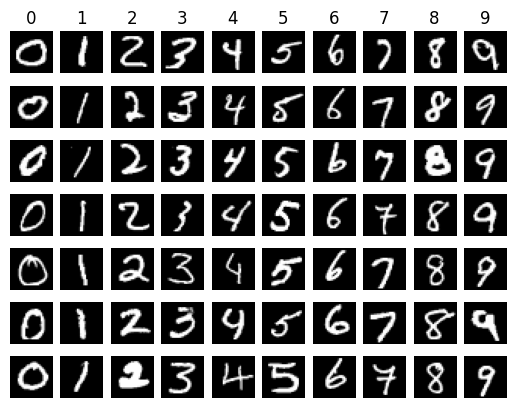

In [54]:
# Visualize some examples from the dataset.
# We'll show a few examples of training images from each class.
num_classes = 10
samples_per_class = 7
for cls in range(num_classes):
    idxs = np.argwhere(t_train==cls)
    sample = np.random.choice(idxs.shape[0], samples_per_class, replace=False) # randomly picks 7 from the appearences
    idxs=idxs[sample]

    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + cls + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        img = x_train[idx].reshape(28, 28)

        plt.imshow(img, cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

**QUESTION 1**:What are vanishing gradients? Name one known activation function that has this problem and one that does not.

**ANSWER**:
Vanishing gradients occur when gradients become very small during backpropagation, cuasing to an ineffectively weight updates during training. The sigmoid activation function is prone to this issue due to saturation, where gradients approach zero for large inputs. Conversely, the Rectified Linear Unit (ReLU) activation function avoids saturation for positive inputs, alleviating the vanishing gradient problem.








here we will implement the sigmoid activation function and it's gradient

In [55]:

def sigmoid(x):
    #############################################################################
    #                             YOUR CODE                                     #
    #############################################################################
    sig = 1 / (1 + np.exp(-x))
    ############################################################################
    #                             END OF YOUR CODE                             #
    ############################################################################
    return sig

def sigmoid_grad(x):
    #############################################################################
    #                             YOUR CODE                                     #
    #############################################################################
    sig = sigmoid(x)
    sig_grad = sig*(1-sig)
    ############################################################################
    #                             END OF YOUR CODE                             #
    ############################################################################
    return sig_grad


Implement a fully-vectorized loss function for the Softmax classifier
Make sure the softmax is stable.
To make our softmax function numerically stable,we simply normalize the values in the vector,
by multiplying the numerator and denominator with a constant C.
We can choose an arbitrary value for log(C) term, but generally log(C)=−max(a) is chosen, as it shifts all of elements in the vector to negative to zero, and negatives with large exponents saturate to zero rather than the infinity.

In [56]:
def softmax(x):
    """
  Softmax loss function, should be implemented in a vectorized fashion (without loops)


  Inputs:
  - X: A numpy array of shape (N, C) containing a minibatch of data.
  Returns:
  - probabilities: A numpy array of shape (N, C) containing the softmax probabilities.

  if you are not careful here, it is easy to run into numeric instability
     """
    #############################################################################
    #                             YOUR CODE                                     #
    #############################################################################
    # Shift logits by subtracting the maximum value to prevent overflow
    exp_logits = np.exp(x - np.max(x, axis=1, keepdims=True))
    probabilities = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)

    ############################################################################
    #                             END OF YOUR CODE                             #
    ############################################################################
    return probabilities


def cross_entropy_error(y, t):
    """
    Inputs:

    - t:  A numpy array of shape (N,C) containing  a minibatch of training labels, it is a one-hot array,
      with t[GT]=1 and t=0 elsewhere, where GT is the ground truth label ;
    - y: A numpy array of shape (N, C) containing the softmax probabilities (the NN's output).

    Returns a tuple of:
    - loss as single float (do not forget to divide by the number of samples in the minibatch (N))
    """
    #############################################################################
    #                             YOUR CODE                                     #
    #############################################################################
    error = -np.sum(t * np.log(y)) / y.shape[0]
    ############################################################################
    #                             END OF YOUR CODE                             #
    ############################################################################
    return error

We will design and train a two-layer fully-connected neural network with sigmoid nonlinearity and
softmax cross entropy loss. We assume an input dimension of D=784, a hidden dimension of H, and perform classification over C classes.

The architecture should be fullyconnected -> sigmoid -> fullyconnected -> softmax.

The learnable parameters of the model are stored in the dictionary,
'params', that maps parameter names to numpy arrays.

In the next cell we will initialize the weights and biases, design the fully connected(fc) forward and backward functions that will be in use for the training (using SGD).



In [57]:
def TwoLayerNet( input_size, hidden_size, output_size, weight_init_std=0.01):
    ############################################################################
    # TODO: Initialize the weights and biases of the two-layer net. Weights    #
    # should be initialized from a Gaussian with standard deviation equal to   #
    # weight_init_std, and biases should be initialized to zero. All weights and  #
    # biases should be stored in the dictionary 'params', with first layer  #
    # weights and biases using the keys 'W1' and 'b1' and second layer weights #
    # and biases using the keys 'W2' and 'b2'.                                 #
    ############################################################################
    params = {}

    # Initialize weights with a Gaussian distribution and biases to zeros for the first layer
    params['W1'] = np.random.normal(0, weight_init_std, size=(input_size, hidden_size))
    params['b1'] = np.zeros(hidden_size)
    params['W2'] = np.random.normal(0, weight_init_std, size=(hidden_size, output_size))
    params['b2'] = np.zeros(output_size)

    ############################################################################
    #                             END OF YOUR CODE                             #
    ############################################################################
    return params


def FC_forward(x, w, b):
    """
    Computes the forward pass for a fully-connected layer.
    The input x has shape (N, D) and contains a minibatch of N
    examples, where each example x[i] has shape D and will be transformed to an output vector of dimension M.
    Inputs:
    - x: A numpy array containing input data, of shape (N, D)
    - w: A numpy array of weights, of shape (D, M)
    - b: A numpy array of biases, of shape (M,)

    Returns a tuple of:
    - out: output result of the forward pass, of shape (N, M)
    - cache: (x, w, b)
    """
    out = None
    #############################################################################
    #                             YOUR CODE                                     #
    #############################################################################
    out = x.dot(w) + b
    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################
    cache = (x, w, b)
    return out, cache



def FC_backward(dout, cache):
    """
    Computes the backward pass for a fully-connected layer.
    Inputs:
    - dout: Upstream derivative, of shape (N, M)
    - cache: Tuple of:
      - x: A numpy array containing input data, of shape (N, D)
      - w: A numpy array of weights, of shape (D, M)
      - b: A numpy array of biases, of shape (M,)
    Returns a tuple of:
    - dx: Gradient with respect to x, of shape (N, D)
    - dw: Gradient with respect to w, of shape (D, M)
    - db: Gradient with respect to b, of shape (M,)
    """
    x, w, b = cache
    dx, dw, db = None, None, None

    #############################################################################
    #                             YOUR CODE                                     #
    #############################################################################
    # Compute the gradient of the loss with respect to x
    dx = dout.dot(w.T)

    # Compute the gradient of the loss with respect to w
    dw = x.T.dot(dout)

    # Compute the gradient of the loss with respect to b
    db = np.sum(dout, axis=0)

    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################
    return dx, dw, db



Here we will design the entire model, which outputs the NN's probabilities and gradients.


In [58]:
def Model(params, x, t):
    """
    Computes the backward pass for a fully-connected layer.
    Inputs:
    - params:  dictionary with first layer weights and biases using the keys 'W1' and 'b1' and second layer weights
    and biases using the keys 'W2' and 'b2'. each with dimensions corresponding its input and output dimensions.
    - x: Input data, of shape (N,D)
    - t:  A numpy array of shape (N,C) containing training labels, it is a one-hot array,
      with t[GT]=1 and t=0 elsewhere, where GT is the ground truth label ;
    Returns:
    - y: the output probabilities for the minibatch (at the end of the forward pass) of shape (N,C)
    - grads: dictionary containing gradients of the loss with respect to W1, W2, b1, b2.

    note: use the FC_forward ,FC_backward functions.

    """
    W1, W2 = params['W1'], params['W2']
    b1, b2 = params['b1'], params['b2']
    grads = {'W1': None, 'W2': None, 'b1': None, 'b2': None}

    # Forward pass
    a1, cache1 = FC_forward(x, W1, b1)  # FC layer
    z1 = sigmoid(a1)  # Sigmoid activation
    a2, cache2 = FC_forward(z1, W2, b2)  # FC layer
    y = softmax(a2)  # Softmax layer

    # Compute loss (assuming cross_entropy_error is defined elsewhere)
    #loss = cross_entropy_error(y, t)

    # Backward pass
    # Derivative of cross entropy error with softmax
    # dy = (y - t) / x.shape[0]  # dL/dy
    dcost_dy=y-t
    dy_dz=np.multiply(y,np.ones(np.shape(y))-y)
    dcost_dz=np.multiply(dcost_dy,dy_dz)

    # Second layer gradients
    dz1, dW2, db2 = FC_backward(dcost_dz, cache2)
    grads['W2'], grads['b2'] = dW2, db2

    # Derivative through sigmoid
    da1 = sigmoid_grad(a1) * dz1

    # First layer gradients
    dx, dW1, db1 = FC_backward(da1, cache1)
    grads['W1'], grads['b1'] = dW1, db1


    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################

    return grads, y

Compute the accuracy of the NNs predictions.


In [59]:


def accuracy(y,t):
    """
    Computes the accuracy of the NN's predictions.
    Inputs:
    - t:  A numpy array of shape (N,C) containing training labels, it is a one-hot array,
      with t[GT]=1 and t=0 elsewhere, where GT is the ground truth label ;
    - y: the output probabilities for the minibatch (at the end of the forward pass) of shape (N,C)
    Returns:
    - accuracy: a single float of the average accuracy.
    """
    #############################################################################
    #                             YOUR CODE                                     #
    #############################################################################
    # Find the index of the maximum score in the predictions
    y_pred = np.argmax(y, axis=1)
    # Similarly, for the true labels
    t_actual = np.argmax(t, axis=1)

    # Calculate the number of correctly predicted examples
    correct_predictions = np.sum(y_pred == t_actual)

    # Calculate the accuracy
    accuracy = correct_predictions / y.shape[0]

    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################
    return accuracy



Trianing the model:
To train our network we will use minibatch SGD.  
*Note that the test dataset is actually used as the validation dataset in the training

training of 300 epochs, each epoch will have 75 iterations
train acc: 0.158% |  test acc: 0.1709% |  loss for epoch 0: 2.2705668585847936
train acc: 0.328% |  test acc: 0.3153% |  loss for epoch 1: 1.9891961749203135
train acc: 0.567% |  test acc: 0.6963% |  loss for epoch 2: 1.7713238883406044
train acc: 0.732% |  test acc: 0.7425% |  loss for epoch 3: 1.4772616338842721
train acc: 0.786% |  test acc: 0.8142% |  loss for epoch 4: 1.2494359851500536
train acc: 0.811% |  test acc: 0.8303% |  loss for epoch 5: 1.0846450941600851
train acc: 0.820% |  test acc: 0.8337% |  loss for epoch 6: 0.8936970308031413
train acc: 0.867% |  test acc: 0.8758% |  loss for epoch 7: 0.5204705554171241
train acc: 0.873% |  test acc: 0.8858% |  loss for epoch 8: 0.4413892377097871
train acc: 0.868% |  test acc: 0.8736% |  loss for epoch 9: 0.44674516140105985
train acc: 0.877% |  test acc: 0.8917% |  loss for epoch 10: 0.42933617973639676
train acc: 0.888% |  test acc: 0.8831% |  loss for epoch 11: 0.398950

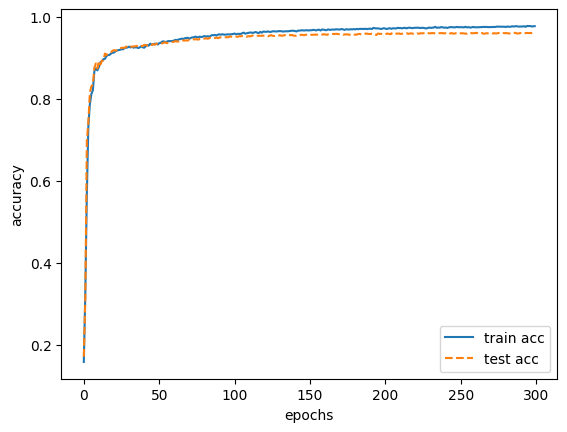

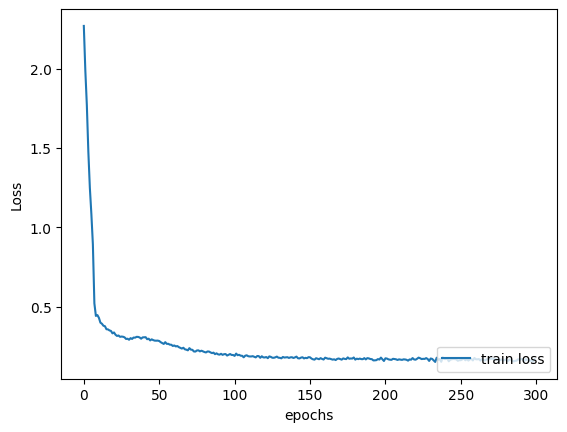

In [60]:
# You should be able to receive at least 97% accuracy, choose hyperparameters accordingly.
epochs = 300
mini_batch_size = 800
learning_rate = 0.002
num_hidden_cells = 300

def Train(epochs_num, batch_size, lr, H):
    #  Dividing a dataset into training data and test data

    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
    C=10
    D=x_train.shape[1]
    network_params = TwoLayerNet(input_size=D, hidden_size=H, output_size=C) #hidden_size is the only hyperparameter here

    train_size = x_train.shape[0]
    train_loss_list = []
    train_acc_list = []
    test_acc_list = []
    iter_per_epoch = round(train_size / batch_size)

    print('training of ' + str(epochs_num) +' epochs, each epoch will have '+ str(iter_per_epoch)+ ' iterations')
    for i in range(epochs_num):

        train_loss_iter= []
        train_acc_iter= []

        for k in range(iter_per_epoch):


            #############################################################################
            #                             YOUR CODE                                     #
            #############################################################################
            # 1. Select part of training data (mini-batch) randomly
            indices = np.random.choice(x_train.shape[0], mini_batch_size, replace=False)  # Randomly select B unique indices
            x_batch = x_train[indices]  # Use the selected indices to get the mini-batch
            t_batch = t_train[indices]
            # 2.1 Calculate the predictions and the gradients to reduce the value of the loss function
            grads, y_batch = Model(network_params,x_batch,t_batch)

            # 3. Update weights and biases with the gradients
            network_params['W1'] -= lr * grads['W1']
            network_params['b1'] -= lr * grads['b1']
            network_params['W2'] -= lr * grads['W2']
            network_params['b2'] -= lr * grads['b2']

            #############################################################################
            #                             END OF YOUR CODE                              #
            #############################################################################

            # Calculate the loss and accuracy for visalizaton
            error=cross_entropy_error(y_batch, t_batch)
            train_loss_iter.append(error)
            acc_iter=accuracy(y_batch, t_batch)
            train_acc_iter.append(acc_iter)
            if k == iter_per_epoch-1:
                train_acc = np.mean(train_acc_iter)
                train_acc_list.append(train_acc)
                train_loss_list.append(np.mean(train_loss_iter))

                _, y_test = Model(network_params, x_test, t_test)
                test_acc = accuracy(y_test, t_test)
                test_acc_list.append(test_acc)
                print("train acc: " + str(train_acc)[:5] + "% |  test acc: "   + str(test_acc) + "% |  loss for epoch " + str(i) +": "+ str(np.mean(train_loss_iter)))
    return train_acc_list, test_acc_list, train_loss_list, network_params

train_acc, test_acc, train_loss, net_params = Train(epochs, mini_batch_size, learning_rate, num_hidden_cells)

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc))
plt.plot(x, train_acc, label='train acc')
plt.plot(x, test_acc, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(loc='lower right')
plt.show()


markers = {'train': 'o'}
x = np.arange(len(train_loss))
plt.plot(x, train_loss, label='train loss')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(loc='lower right')
plt.show()


# You should be able to receive at least 97% accuracy, choose hyperparameters accordingly.


**QUESTION 2:** Explain the results looking at the visualizations above, base your answer on the hyperparameters.

**ANSWER:**

The accuracy and loss curves suggest that the model with the given hyperparameters is learning effectively and generalizing well to unseen data. The accuracy for both training and test sets quickly reaches a high level and plateaus, indicating no overfitting and that the model has likely reached its performance capacity with the current settings. The learning rate of 0.002 is appropriate, as evidenced by the smooth convergence without oscillations. The mini-batch size of 800 provides a good balance between gradient estimation and computational efficiency. With 300 hidden cells, the model has enough capacity to learn the task to a high accuracy, as no divergence between training and test accuracy is observed. Overall, the chosen hyperparameters appear suitable for this classification task.





**QUESTION** 3: Suggest a way to improve the results by changing the networks's architecture  

**ANSWER**:
There are several ways for improving the results and the training process, the main ways are:
1. Using regularizations such as batch normalizations and dropout
2. Adding more layers making the net capable to handle with more complex patterns
3. Using Adam optimization for the gradients updates
4. Using Relu activation function




(784, 300)


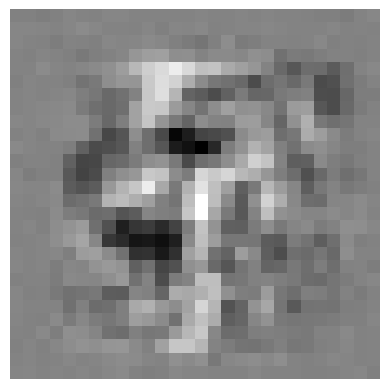

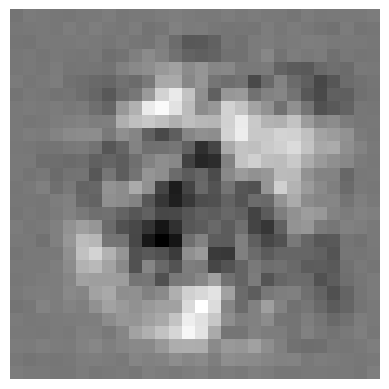

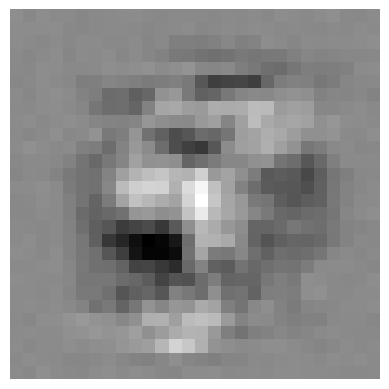

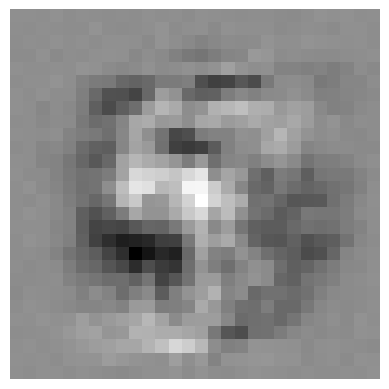

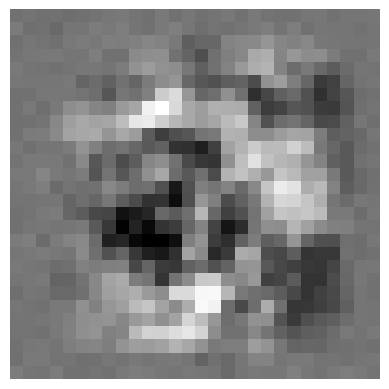

In [61]:
# Visualize some weights. features of digits should be somehow present.
def show_net_weights(params):
    W1 = params['W1']
    print(W1.shape)
    for i in range(5):
        W = W1[:,i*5].reshape(28, 28)
        plt.imshow(W,cmap='gray')
        plt.axis('off')
        plt.show()

show_net_weights(net_params)


Implement, train and test the same two-layer network, using a **deep learning library** (pytorch/tensorflow/keras).

As before, you should be able to receive at least 97% accuracy.

Please note, that in this section you will need to implement the model, the training and the testing by yourself (you may use the code in earlier sections)
Don't forget to print the accuracy during training (in the same format as before).

For installing a deep learning library, you should use "!pip3 install..." (lookup the compatible syntex for your library)

train acc: 0.520% |  test acc: 0.732% |  loss for epoch 0: 2.016349718598525
train acc: 0.829% |  test acc: 0.8969% |  loss for epoch 1: 1.6951955275754131
train acc: 0.908% |  test acc: 0.9184% |  loss for epoch 2: 1.5913616967618465
train acc: 0.921% |  test acc: 0.9252% |  loss for epoch 3: 1.5650449964960416
train acc: 0.928% |  test acc: 0.9311% |  loss for epoch 4: 1.5517863562901817
train acc: 0.937% |  test acc: 0.9362% |  loss for epoch 5: 1.5405179875095685
train acc: 0.941% |  test acc: 0.9388% |  loss for epoch 6: 1.5353892270584901
train acc: 0.945% |  test acc: 0.9417% |  loss for epoch 7: 1.5289276842931907
train acc: 0.950% |  test acc: 0.9448% |  loss for epoch 8: 1.524341185839971
train acc: 0.952% |  test acc: 0.9466% |  loss for epoch 9: 1.5204329003552595
train acc: 0.954% |  test acc: 0.948% |  loss for epoch 10: 1.5176524895270664
train acc: 0.958% |  test acc: 0.9511% |  loss for epoch 11: 1.5134926960547768
train acc: 0.960% |  test acc: 0.9529% |  loss for epo

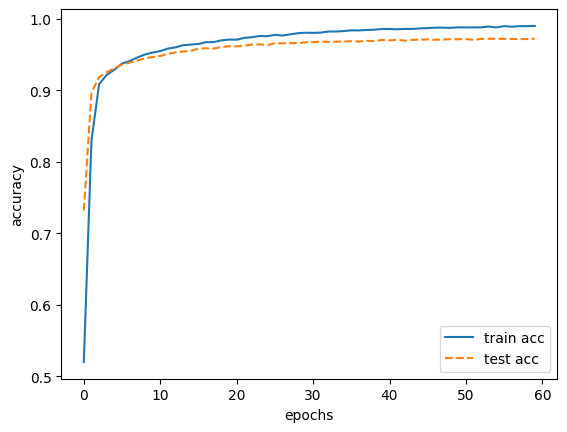

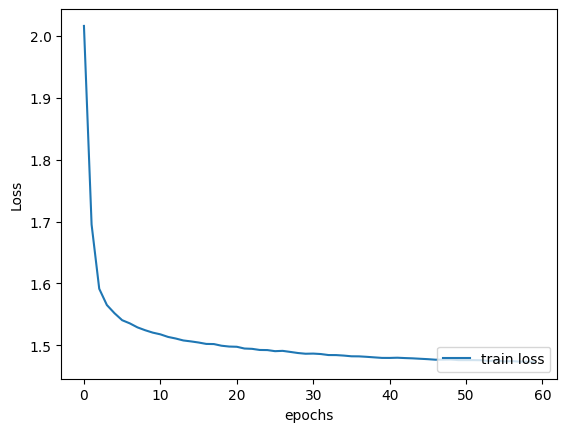

In [62]:
 #############################################################################
 #                             YOUR CODE                                     #
 #############################################################################
import torch
from torch import nn, optim

# model architecture using pytorch
class Net(nn.Module):

  def __init__(self,d,h,c):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(d, h)
    self.sigmoid = nn.Sigmoid()
    self.fc2 = nn.Linear(h, c)
    self.softmax = nn.Softmax(dim=1)

  def forward(self, x): # We don't really need so 3 layers, but for the example.
    x = self.fc1(x)
    x = self.sigmoid(x)
    x = self.fc2(x)
    x = self.softmax(x)
    return x


epochs = 60
mini_batch_size = 800
learning_rate = 0.002
num_hidden_cells = 100

### Train ###
def Train(epochs_num, batch_size, lr, H):
  (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
  x_train = torch.tensor(x_train)
  t_train = torch.tensor(t_train)
  x_test = torch.tensor(x_test)
  t_test = torch.tensor(t_test)

  D = x_train.shape[1]
  model = Net(D, num_hidden_cells,c=10)
  loss_fn = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=learning_rate)


  train_size = x_train.shape[0]
  iter_per_epoch = round(train_size / batch_size)

  train_loss_list = []
  train_acc_list = []
  test_acc_list = []

  for i in range(epochs_num):
    train_loss_iter= []
    train_acc_iter= []

    # Make sure gradient tracking is on, and do a pass over the data
    model.train(True)
    for k in range(iter_per_epoch):
        indices = np.random.choice(x_train.shape[0], mini_batch_size, replace=False)  # Randomly select B unique indices
        x_batch = x_train[indices]  # Use the selected indices to get the mini-batch
        t_batch = t_train[indices]
        y_batch = model(x_batch) # Feed-forward

        loss = loss_fn(y_batch, t_batch) # Evaluate loss
        optimizer.zero_grad() # Zero the gradients before running the backward pass. This is
        loss.backward() # Compute gradient of the loss with respect to all the learnable par
        optimizer.step() # Update weights


        # Calculate the loss and accuracy for visalizaton
        train_loss_iter.append(loss.detach().numpy())
        acc_iter=accuracy(y_batch.detach().numpy(), t_batch.detach().numpy())
        train_acc_iter.append(acc_iter)
        if k == iter_per_epoch-1:
            train_acc = np.mean(train_acc_iter)
            train_acc_list.append(train_acc)
            train_loss_list.append(np.mean(train_loss_iter))

            # Set the model to evaluation mode, disabling dropout and using population
            # statistics for batch normalization.
            model.eval()
            # Disable gradient computation and reduce memory consumption.
            with torch.no_grad():
              y_test = model(x_test)
              test_acc = accuracy(y_test.detach().numpy(), t_test.detach().numpy())
              test_acc_list.append(test_acc)

            print("train acc: " + str(train_acc)[:5] + "% |  test acc: "   + str(test_acc) + "% |  loss for epoch " + str(i) +": "+ str(np.mean(train_loss_iter)))

  return train_acc_list, test_acc_list, train_loss_list

train_acc, test_acc, train_loss = Train(epochs, mini_batch_size, learning_rate, num_hidden_cells)

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc))
plt.plot(x, train_acc, label='train acc')
plt.plot(x, test_acc, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(loc='lower right')
plt.show()

markers = {'train': 'o'}
x = np.arange(len(train_loss))
plt.plot(x, train_loss, label='train loss')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(loc='lower right')
plt.show()